# 📊 Analyse Exploratoire des Données (EDA) - Campagnes Marketing

## Objectif du projet
L'objectif de ce notebook est de réaliser une **analyse exploratoire complète** d'un dataset de campagnes marketing afin de :
- Comprendre la structure et la qualité des données
- Identifier les patterns et tendances
- Préparer les données pour un modèle de **Machine Learning** (régression linéaire)

## Structure du Notebook
1. Importation des bibliothèques
2. Chargement des données
3. Exploration initiale
4. Analyse des valeurs manquantes
5. Analyse statistique descriptive
6. Visualisations
7. Analyse des corrélations
8. Préparation pour le modèle ML

## 1. Importation des bibliothèques nécessaires

On commence par importer les bibliothèques essentielles :
- **pandas** : manipulation des données
- **numpy** : calculs numériques
- **matplotlib & seaborn** : visualisations
- **warnings** : pour ignorer les avertissements inutiles

In [1]:
# Importation des bibliothèques
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuration
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

print("✅ Bibliothèques importées avec succès !")

✅ Bibliothèques importées avec succès !


## 2. Chargement des données

On charge le dataset `marketing_campaign_dataset.csv` depuis le dossier `datasets/`.

In [2]:
# Chargement du dataset
df = pd.read_csv('datasets/marketing_campaign_dataset.csv')

print(f"📁 Dataset chargé avec succès !")
print(f"📊 Dimensions : {df.shape[0]} lignes × {df.shape[1]} colonnes")

📁 Dataset chargé avec succès !
📊 Dimensions : 200000 lignes × 16 colonnes


## 3. Exploration initiale des données

### 3.1 Aperçu des premières lignes
Visualisons les premières lignes pour comprendre la structure des données.

In [3]:
# Aperçu des 5 premières lignes
df.head()

,Campaign_ID,Company,Campaign_Type,Target_Audience,Duration,Channel_Used,Conversion_Rate,Acquisition_Cost,ROI,Location,Language,Clicks,Impressions,Engagement_Score,Customer_Segment,Date
0,1,Innovate Industries,Email,Men 18-24,30 days,Google Ads,0.04,"$16,174.00",6.29,Chicago,Spanish,506,1922,6,Health & Wellness,2021-01-01
1,2,NexGen Systems,Email,Women 35-44,60 days,Google Ads,0.12,"$11,566.00",5.61,New York,German,116,7523,7,Fashionistas,2021-01-02
2,3,Alpha Innovations,Influencer,Men 25-34,30 days,YouTube,0.07,"$10,200.00",7.18,Los Angeles,French,584,7698,1,Outdoor Adventurers,2021-01-03
3,4,DataTech Solutions,Display,All Ages,60 days,YouTube,0.11,"$12,724.00",5.55,Miami,Mandarin,217,1820,7,Health & Wellness,2021-01-04
4,5,NexGen Systems,Email,Men 25-34,15 days,YouTube,0.05,"$16,452.00",6.50,Los Angeles,Mandarin,379,4201,3,Health & Wellness,2021-01-05


### 3.2 Informations sur les colonnes
Examinons les types de données et les informations générales sur chaque colonne.

In [4]:
# Informations sur le dataset
print("📋 Informations sur le dataset :")
print("=" * 50)
df.info()

📋 Informations sur le dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Campaign_ID       200000 non-null  int64  
 1   Company           200000 non-null  object 
 2   Campaign_Type     200000 non-null  object 
 3   Target_Audience   200000 non-null  object 
 4   Duration          200000 non-null  object 
 5   Channel_Used      200000 non-null  object 
 6   Conversion_Rate   200000 non-null  float64
 7   Acquisition_Cost  200000 non-null  object 
 8   ROI               200000 non-null  float64
 9   Location          200000 non-null  object 
 10  Language          200000 non-null  object 
 11  Clicks            200000 non-null  int64  
 12  Impressions       200000 non-null  int64  
 13  Engagement_Score  200000 non-null  int64  
 14  Customer_Segment  200000 non-null  object 
 15  Date              200000 non-null  o

### 3.3 Liste des colonnes
Affichons la liste complète des colonnes disponibles.

In [5]:
# Liste des colonnes
print("📌 Colonnes du dataset :")
print("=" * 50)
for i, col in enumerate(df.columns, 1):
    print(f"{i}. {col}")

📌 Colonnes du dataset :
1. Campaign_ID
2. Company
3. Campaign_Type
4. Target_Audience
5. Duration
6. Channel_Used
7. Conversion_Rate
8. Acquisition_Cost
9. ROI
10. Location
11. Language
12. Clicks
13. Impressions
14. Engagement_Score
15. Customer_Segment
16. Date


## 4. Analyse des valeurs manquantes

Vérifions s'il y a des valeurs manquantes dans notre dataset. C'est crucial avant de construire un modèle ML.

In [6]:
# Analyse des valeurs manquantes
print("🔍 Valeurs manquantes par colonne :")
print("=" * 50)
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Valeurs manquantes': missing_values,
    'Pourcentage (%)': missing_percent.round(2)
})

print(missing_df)
print(f"\n📊 Total de valeurs manquantes : {df.isnull().sum().sum()}")

🔍 Valeurs manquantes par colonne :
                  Valeurs manquantes  Pourcentage (%)
Campaign_ID                        0              0.0
Company                            0              0.0
Campaign_Type                      0              0.0
Target_Audience                    0              0.0
Duration                           0              0.0
Channel_Used                       0              0.0
Conversion_Rate                    0              0.0
Acquisition_Cost                   0              0.0
ROI                                0              0.0
Location                           0              0.0
Language                           0              0.0
Clicks                             0              0.0
Impressions                        0              0.0
Engagement_Score                   0              0.0
Customer_Segment                   0              0.0
Date                               0              0.0

📊 Total de valeurs manquantes : 0


## 5. Nettoyage des données

### 5.1 Conversion de la colonne Acquisition_Cost
La colonne `Acquisition_Cost` contient des valeurs au format monétaire (ex: "$16,174.00"). Il faut la convertir en format numérique.

In [7]:
# Conversion de Acquisition_Cost en numérique
df['Acquisition_Cost'] = df['Acquisition_Cost'].replace('[\$,]', '', regex=True).astype(float)

# Conversion de la colonne Date en datetime
df['Date'] = pd.to_datetime(df['Date'])

print("✅ Colonnes nettoyées !")
print(f"📊 Type de Acquisition_Cost : {df['Acquisition_Cost'].dtype}")
print(f"📊 Type de Date : {df['Date'].dtype}")

✅ Colonnes nettoyées !
📊 Type de Acquisition_Cost : float64
📊 Type de Date : datetime64[ns]


## 6. Statistiques descriptives

Analysons les statistiques de base pour les variables numériques.

In [8]:
# Statistiques descriptives pour les variables numériques
print("📈 Statistiques descriptives :")
print("=" * 50)
df.describe().T

📈 Statistiques descriptives :


,count,mean,min,25%,50%,75%,max,std
Campaign_ID,200000.0,100000.5,1.0,50000.75,100000.5,150000.25,200000.0,57735.171256
Conversion_Rate,200000.0,0.08007,0.01,0.05,0.08,0.12,0.15,0.040602
Acquisition_Cost,200000.0,12504.39304,5000.0,8739.75,12496.5,16264.0,20000.0,4337.664545
ROI,200000.0,5.002438,2.0,3.5,5.01,6.51,8.0,1.734488
Clicks,200000.0,549.77203,100.0,325.0,550.0,775.0,1000.0,260.019056
Impressions,200000.0,5507.30152,1000.0,3266.0,5517.5,7753.0,10000.0,2596.864286
Engagement_Score,200000.0,5.49471,1.0,3.0,5.0,8.0,10.0,2.872581
Date,200000,2021-07-01 23:35:09.600000,2021-01-01 00:00:00,2021-04-02 00:00:00,2021-07-02 00:00:00,2021-10-01 00:00:00,2021-12-31 00:00:00,NaN


## 7. Analyse des variables catégorielles

Examinons les valeurs uniques pour chaque variable catégorielle.

In [9]:
# Analyse des variables catégorielles
categorical_cols = df.select_dtypes(include=['object']).columns

print("📋 Variables catégorielles et leurs valeurs uniques :")
print("=" * 50)

for col in categorical_cols:
    print(f"\n🔹 {col} ({df[col].nunique()} valeurs uniques) :")
    print(df[col].value_counts().head(10))

📋 Variables catégorielles et leurs valeurs uniques :

🔹 Company (5 valeurs uniques) :
Company
TechCorp               40237
Alpha Innovations      40051
DataTech Solutions     40012
NexGen Systems         39991
Innovate Industries    39709
Name: count, dtype: int64

🔹 Campaign_Type (5 valeurs uniques) :
Campaign_Type
Influencer      40169
Search          40157
Display         39987
Email           39870
Social Media    39817
Name: count, dtype: int64

🔹 Target_Audience (5 valeurs uniques) :
Target_Audience
Men 18-24      40258
Men 25-34      40023
All Ages       40019
Women 25-34    40013
Women 35-44    39687
Name: count, dtype: int64

🔹 Duration (4 valeurs uniques) :
Duration
30 days    50255
45 days    50100
60 days    49866
15 days    49779
Name: count, dtype: int64

🔹 Channel_Used (6 valeurs uniques) :
Channel_Used
Email         33599
Google Ads    33438
YouTube       33392
Instagram     33392
Website       33360
Facebook      32819
Name: count, dtype: int64

🔹 Location (5 valeurs u

## 8. Visualisations

### 8.1 Distribution des variables numériques
Visualisons la distribution des principales variables numériques avec des histogrammes.

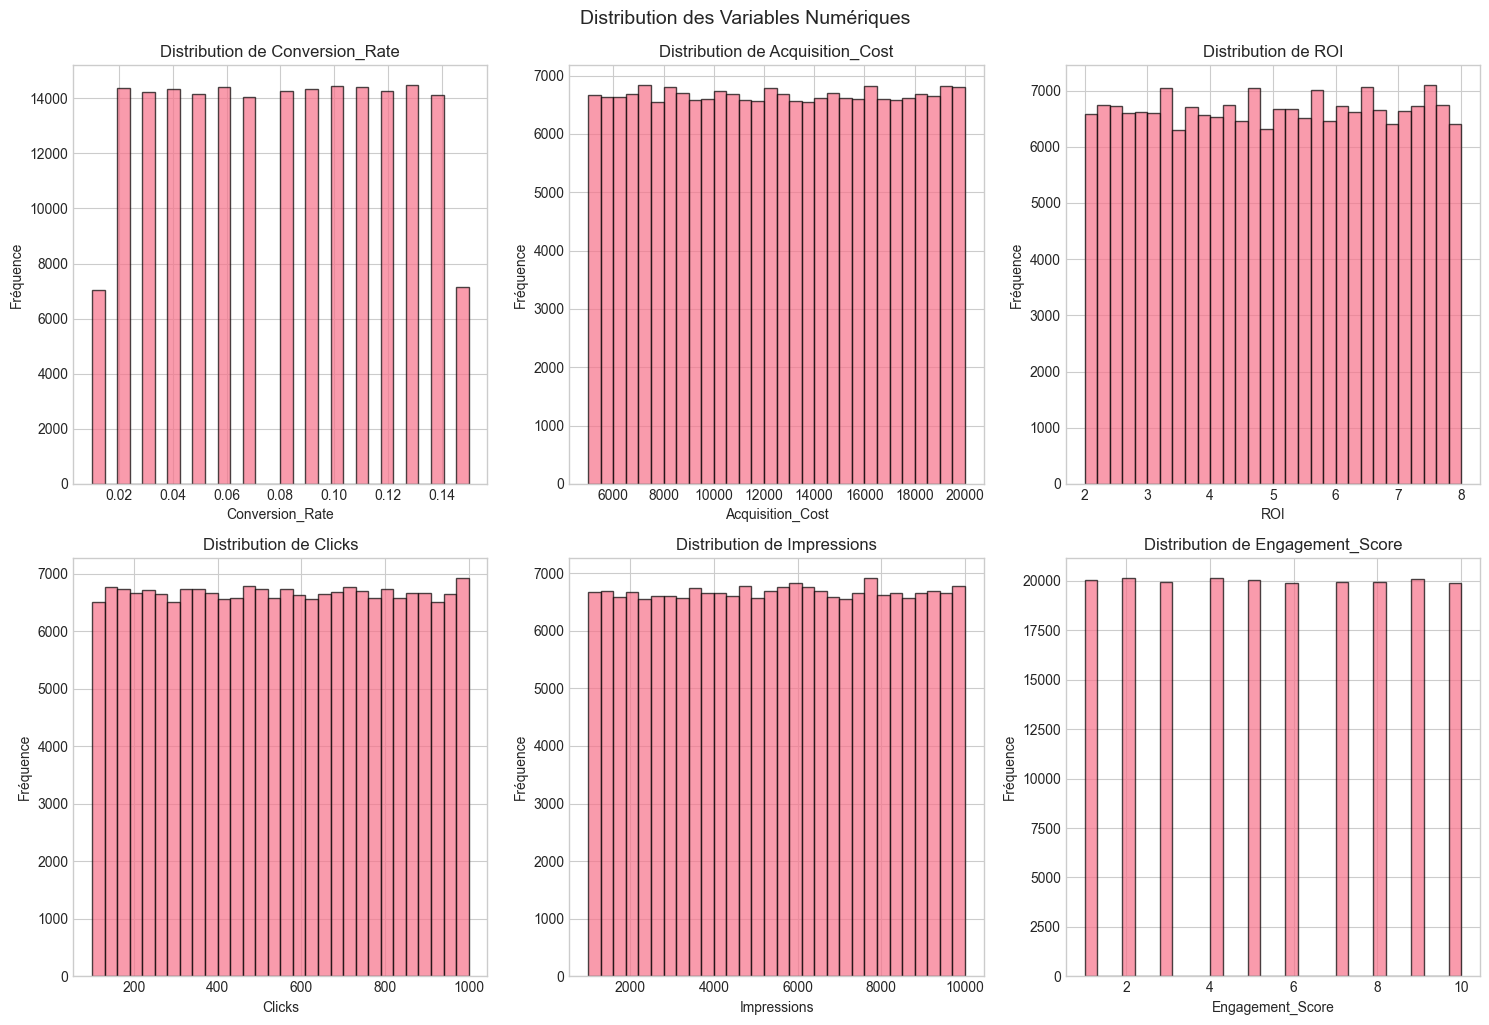

In [10]:
# Distribution des variables numériques
numeric_cols = ['Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    axes[i].hist(df[col], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'Distribution de {col}', fontsize=12)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Fréquence')

plt.tight_layout()
plt.suptitle('Distribution des Variables Numériques', fontsize=14, y=1.02)
plt.show()

### 8.2 Boxplots pour détecter les outliers
Les boxplots nous aident à identifier les valeurs aberrantes (outliers).

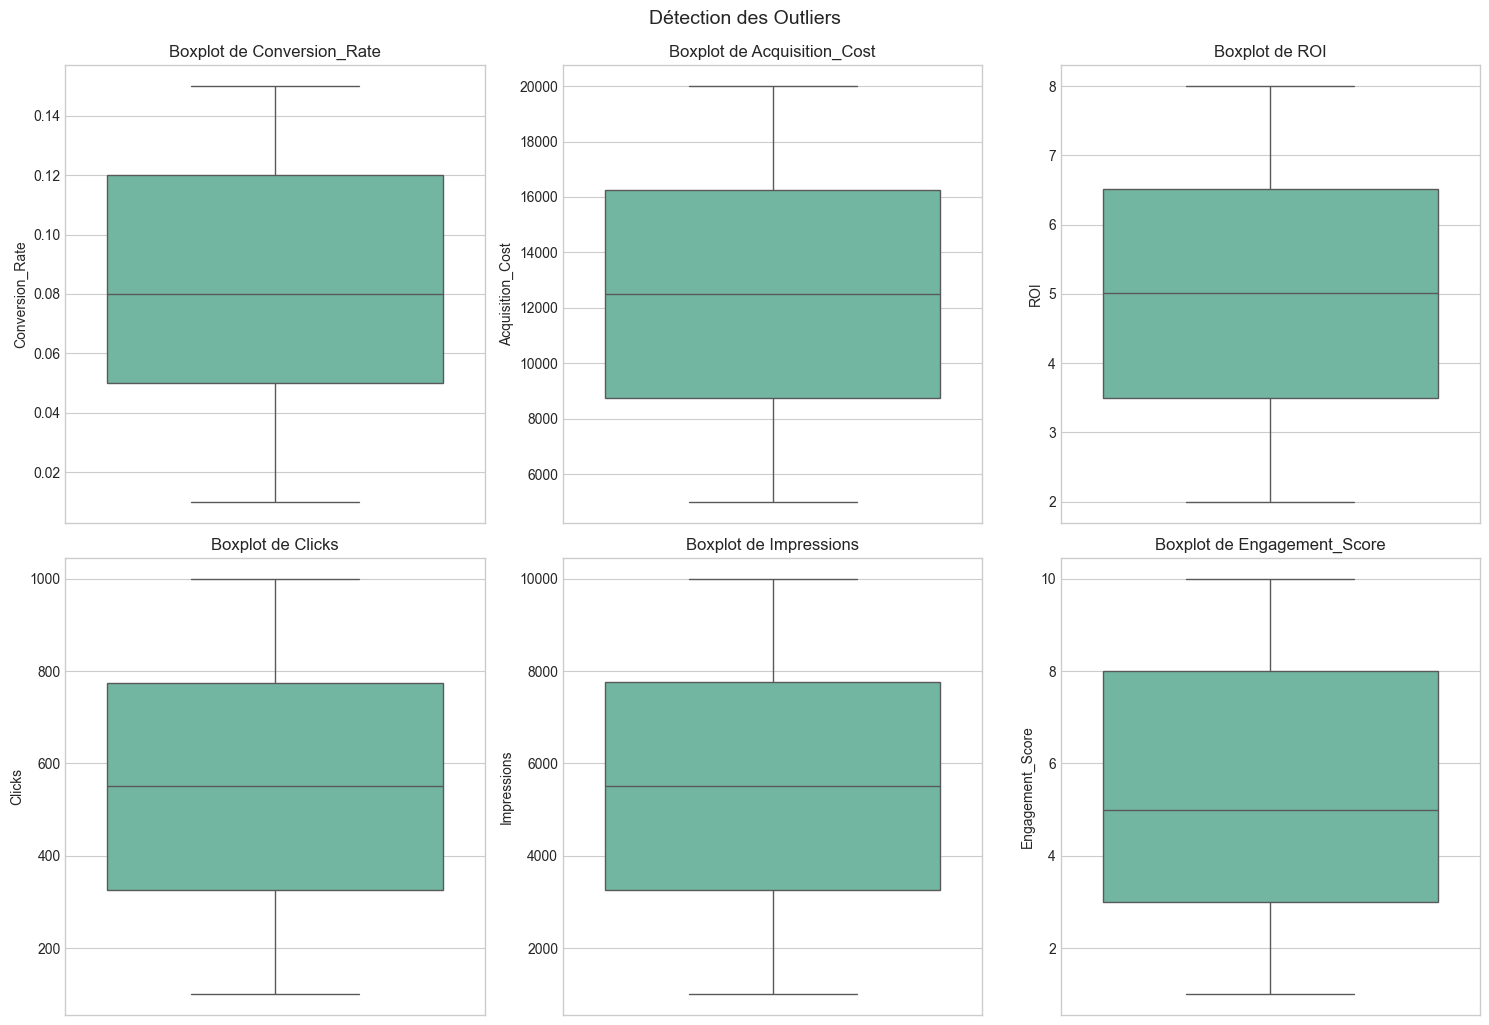

In [11]:
# Boxplots pour détecter les outliers
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.boxplot(data=df, y=col, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Boxplot de {col}', fontsize=12)

plt.tight_layout()
plt.suptitle('Détection des Outliers', fontsize=14, y=1.02)
plt.show()

### 8.3 Distribution par type de campagne
Analysons le ROI selon le type de campagne.

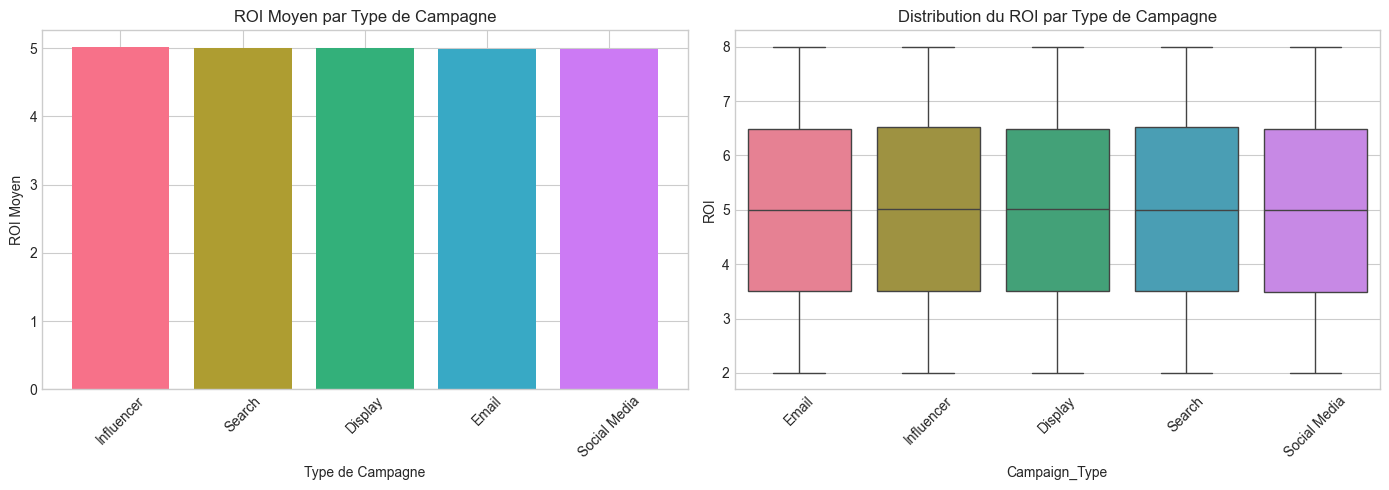

In [12]:
# ROI par type de campagne
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Barplot du ROI moyen par type de campagne
roi_by_campaign = df.groupby('Campaign_Type')['ROI'].mean().sort_values(ascending=False)
axes[0].bar(roi_by_campaign.index, roi_by_campaign.values, color=sns.color_palette('husl', len(roi_by_campaign)))
axes[0].set_title('ROI Moyen par Type de Campagne', fontsize=12)
axes[0].set_xlabel('Type de Campagne')
axes[0].set_ylabel('ROI Moyen')
axes[0].tick_params(axis='x', rotation=45)

# Boxplot du ROI par type de campagne
sns.boxplot(data=df, x='Campaign_Type', y='ROI', ax=axes[1], palette='husl')
axes[1].set_title('Distribution du ROI par Type de Campagne', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 8.4 Distribution par canal utilisé
Analysons les performances selon le canal de diffusion.

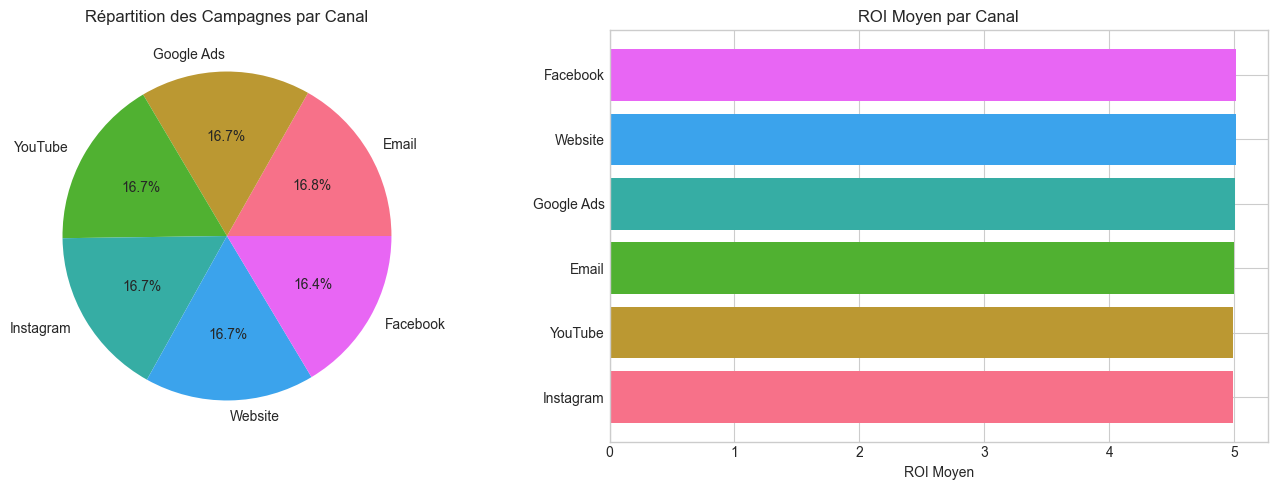

In [13]:
# Performances par canal utilisé
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Nombre de campagnes par canal
channel_counts = df['Channel_Used'].value_counts()
axes[0].pie(channel_counts.values, labels=channel_counts.index, autopct='%1.1f%%', 
            colors=sns.color_palette('husl', len(channel_counts)))
axes[0].set_title('Répartition des Campagnes par Canal', fontsize=12)

# ROI moyen par canal
roi_by_channel = df.groupby('Channel_Used')['ROI'].mean().sort_values(ascending=True)
axes[1].barh(roi_by_channel.index, roi_by_channel.values, color=sns.color_palette('husl', len(roi_by_channel)))
axes[1].set_title('ROI Moyen par Canal', fontsize=12)
axes[1].set_xlabel('ROI Moyen')

plt.tight_layout()
plt.show()

## 9. Matrice de corrélation

La matrice de corrélation nous permet d'identifier les relations entre les variables numériques. C'est essentiel pour choisir les features du modèle de régression linéaire.

> ⚠️ **Note importante** : Si les corrélations sont très faibles (proches de 0), cela peut indiquer que :
> - Le dataset est **synthétique/généré aléatoirement**
> - Les variables sont **indépendantes** les unes des autres
> - Un modèle de régression linéaire aura des **performances limitées**

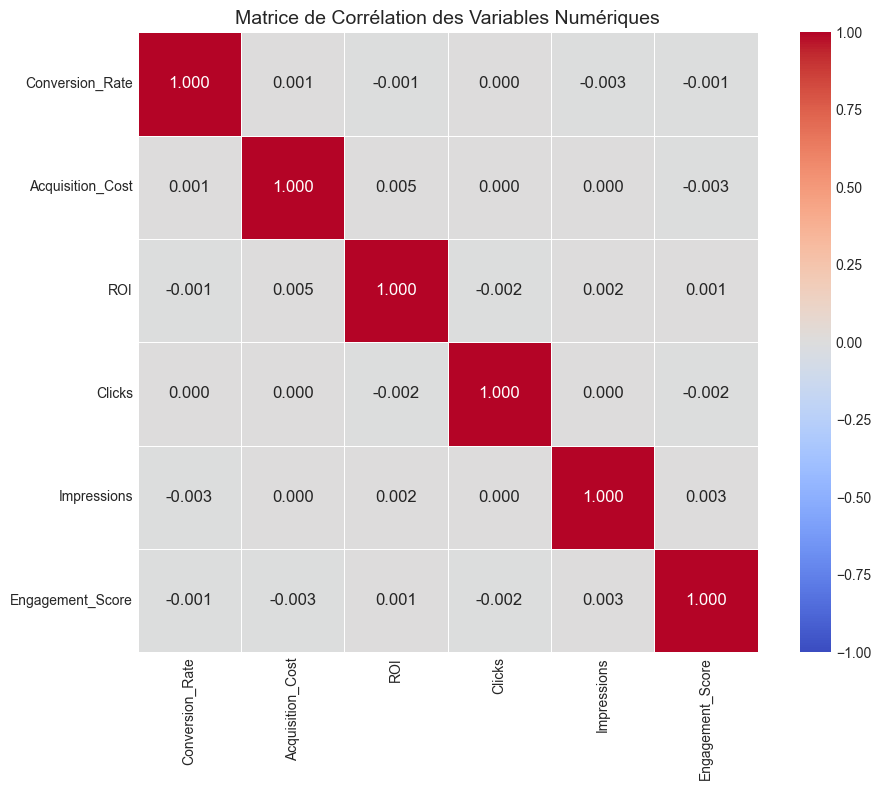


📊 Valeurs de corrélation :
                  Conversion_Rate  Acquisition_Cost       ROI    Clicks  \
Conversion_Rate          1.000000          0.000718 -0.001143  0.000269   
Acquisition_Cost         0.000718          1.000000  0.004585  0.000141   
ROI                     -0.001143          0.004585  1.000000 -0.002040   
Clicks                   0.000269          0.000141 -0.002040  1.000000   
Impressions             -0.002834          0.000329  0.002257  0.000033   
Engagement_Score        -0.000638         -0.003218  0.000588 -0.001908   

                  Impressions  Engagement_Score  
Conversion_Rate     -0.002834         -0.000638  
Acquisition_Cost     0.000329         -0.003218  
ROI                  0.002257          0.000588  
Clicks               0.000033         -0.001908  
Impressions          1.000000          0.003030  
Engagement_Score     0.003030          1.000000  


In [19]:
# Matrice de corrélation (uniquement les variables originales)
cols_for_corr = ['Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score']
numeric_df = df[cols_for_corr]

plt.figure(figsize=(10, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            fmt='.3f', linewidths=0.5, square=True, vmin=-1, vmax=1,
            annot_kws={"size": 12})
plt.title('Matrice de Corrélation des Variables Numériques', fontsize=14)
plt.tight_layout()
plt.show()

# Afficher les valeurs
print("\n📊 Valeurs de corrélation :")
print(correlation_matrix)

### 9.1 Corrélations avec la variable cible (ROI)
Identifions les variables les plus corrélées avec le ROI.

📊 Corrélations avec le ROI :
Acquisition_Cost: 0.0046 (très faible)
Impressions: 0.0023 (très faible)
Engagement_Score: 0.0006 (très faible)
Conversion_Rate: -0.0011 (très faible)
Clicks: -0.0020 (très faible)


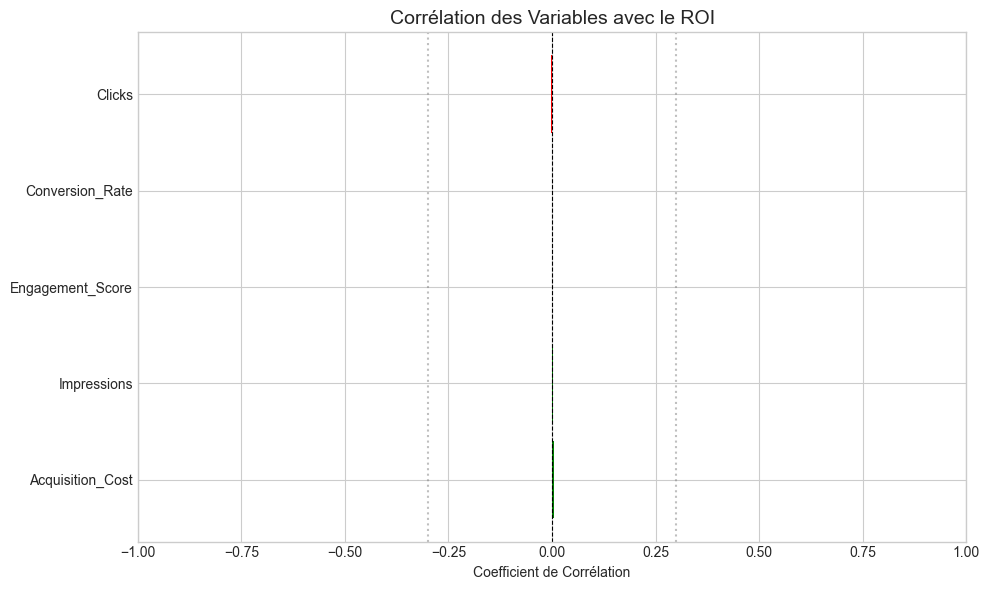


⚠️ OBSERVATION : Les corrélations sont quasi-nulles (< 0.01)
   Cela suggère un dataset synthétique avec des variables indépendantes.


In [20]:
# Corrélations avec ROI
roi_correlations = correlation_matrix['ROI'].drop('ROI').sort_values(ascending=False)

print("📊 Corrélations avec le ROI :")
print("=" * 50)
for col, corr in roi_correlations.items():
    strength = "très faible" if abs(corr) < 0.1 else "faible" if abs(corr) < 0.3 else "modérée" if abs(corr) < 0.5 else "forte"
    print(f"{col}: {corr:.4f} ({strength})")

# Visualisation avec échelle fixe
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in roi_correlations.values]
bars = plt.barh(roi_correlations.index, roi_correlations.values, color=colors)
plt.title('Corrélation des Variables avec le ROI', fontsize=14)
plt.xlabel('Coefficient de Corrélation')
plt.xlim(-1, 1)  # Échelle fixe pour mieux voir
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.axvline(x=0.3, color='gray', linestyle=':', alpha=0.5)
plt.axvline(x=-0.3, color='gray', linestyle=':', alpha=0.5)
plt.tight_layout()
plt.show()

print("\n⚠️ OBSERVATION : Les corrélations sont quasi-nulles (< 0.01)")
print("   Cela suggère un dataset synthétique avec des variables indépendantes.")

## 10. Relations entre variables (Pairplot)

Visualisons les relations entre les principales variables numériques.

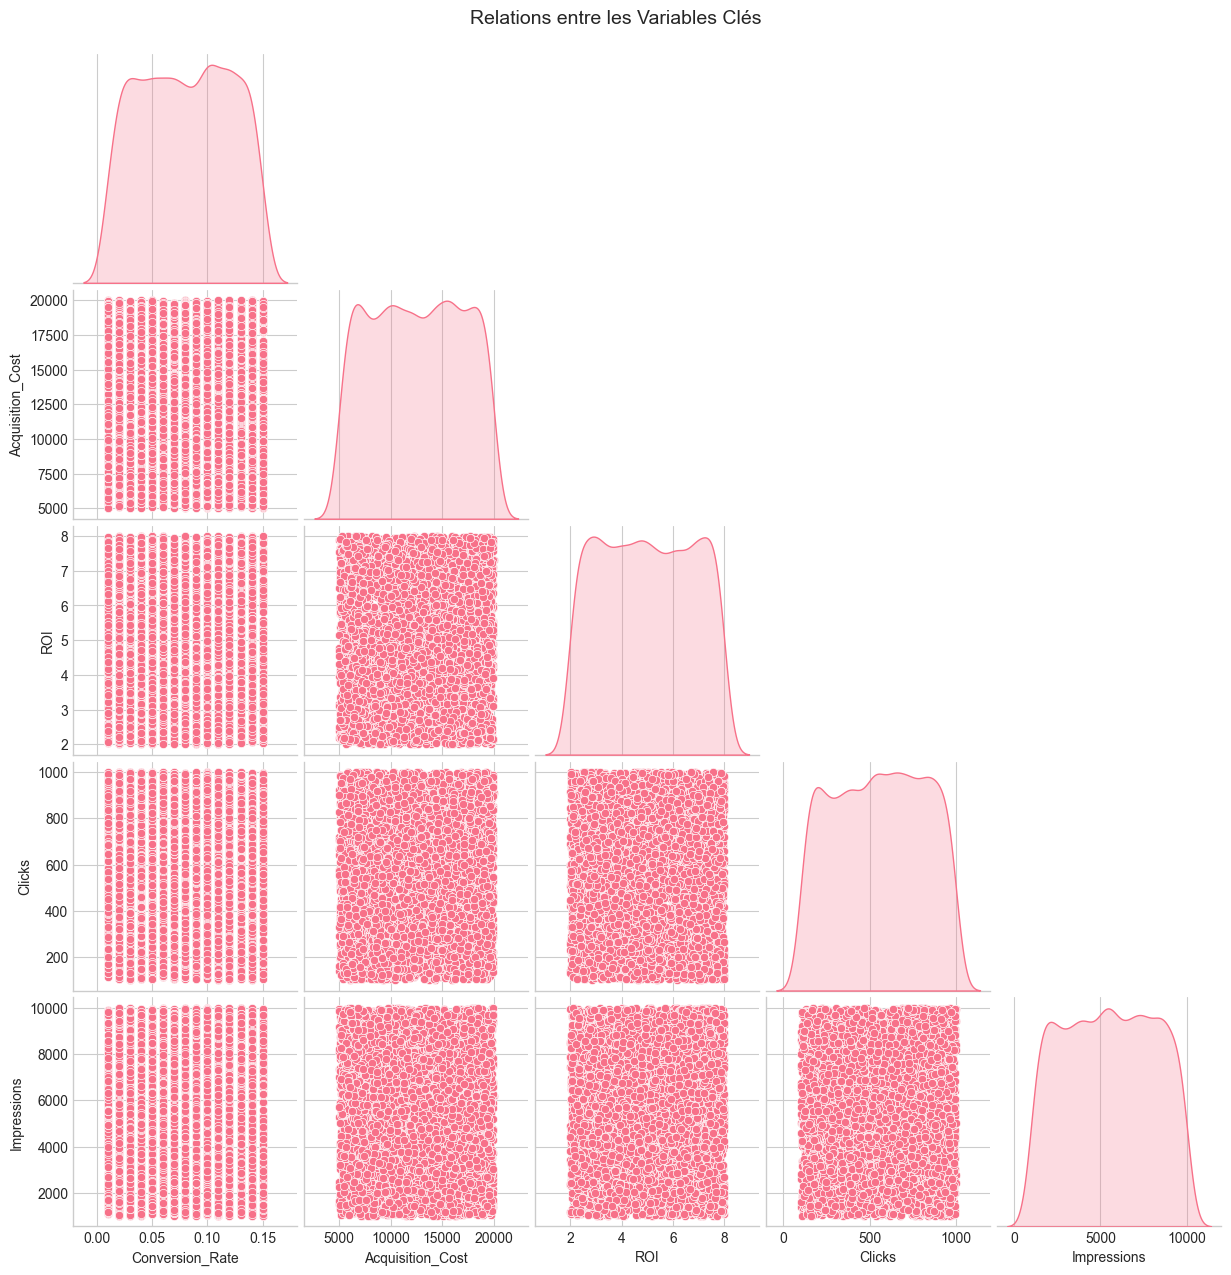

In [16]:
# Pairplot pour les variables clés (échantillon pour la performance)
sample_df = df.sample(n=5000, random_state=42)
key_vars = ['Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions']

sns.pairplot(sample_df[key_vars], diag_kind='kde', corner=True)
plt.suptitle('Relations entre les Variables Clés', fontsize=14, y=1.02)
plt.show()

## 11. Analyse temporelle

Analysons l'évolution des campagnes dans le temps.

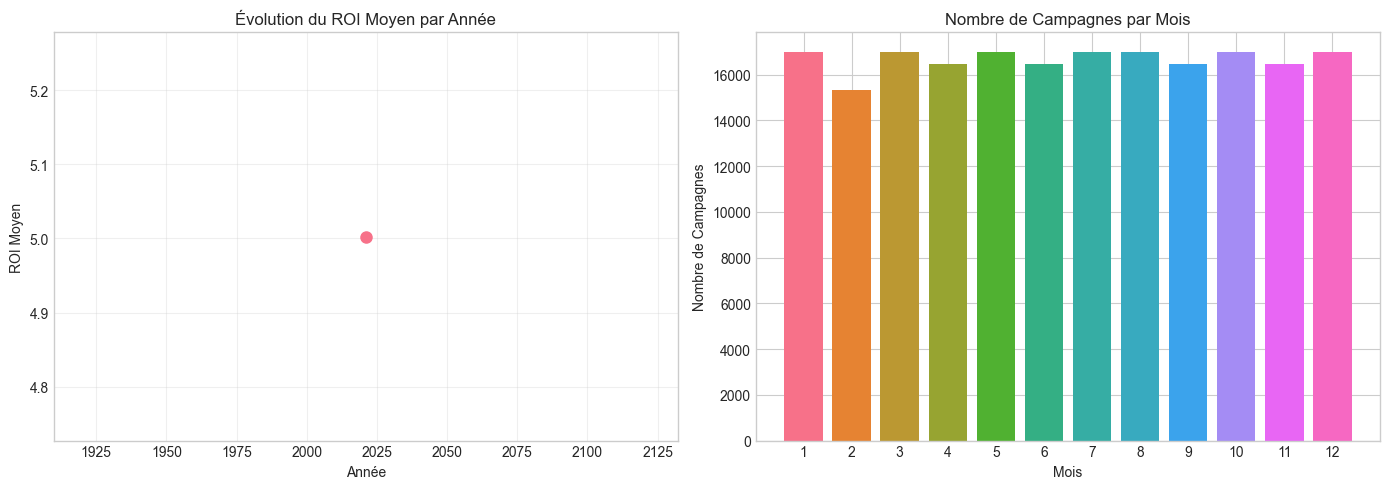

In [17]:
# Analyse temporelle
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ROI moyen par année
roi_by_year = df.groupby('Year')['ROI'].mean()
axes[0].plot(roi_by_year.index, roi_by_year.values, marker='o', linewidth=2, markersize=8)
axes[0].set_title('Évolution du ROI Moyen par Année', fontsize=12)
axes[0].set_xlabel('Année')
axes[0].set_ylabel('ROI Moyen')
axes[0].grid(True, alpha=0.3)

# Nombre de campagnes par mois
campaigns_by_month = df.groupby('Month').size()
axes[1].bar(campaigns_by_month.index, campaigns_by_month.values, color=sns.color_palette('husl', 12))
axes[1].set_title('Nombre de Campagnes par Mois', fontsize=12)
axes[1].set_xlabel('Mois')
axes[1].set_ylabel('Nombre de Campagnes')
axes[1].set_xticks(range(1, 13))

plt.tight_layout()
plt.show()

## 12. Résumé de l'analyse exploratoire

Récapitulons les principales découvertes de notre EDA.

In [18]:
# Résumé de l'analyse
print("=" * 60)
print("📋 RÉSUMÉ DE L'ANALYSE EXPLORATOIRE")
print("=" * 60)

print(f"\n📊 DIMENSIONS DU DATASET:")
print(f"   • Nombre de lignes : {df.shape[0]:,}")
print(f"   • Nombre de colonnes : {df.shape[1]}")

print(f"\n🔢 VARIABLES NUMÉRIQUES:")
num_cols = df.select_dtypes(include=[np.number]).columns
print(f"   • {len(num_cols)} variables : {list(num_cols)}")

print(f"\n📝 VARIABLES CATÉGORIELLES:")
cat_cols = df.select_dtypes(include=['object']).columns
print(f"   • {len(cat_cols)} variables : {list(cat_cols)}")

print(f"\n❌ VALEURS MANQUANTES:")
print(f"   • Total : {df.isnull().sum().sum()}")

print(f"\n📈 STATISTIQUES ROI:")
print(f"   • Moyenne : {df['ROI'].mean():.2f}")
print(f"   • Médiane : {df['ROI'].median():.2f}")
print(f"   • Min : {df['ROI'].min():.2f}")
print(f"   • Max : {df['ROI'].max():.2f}")

print(f"\n🎯 PROCHAINES ÉTAPES:")
print("   1. Encoder les variables catégorielles")
print("   2. Normaliser/Standardiser les features")
print("   3. Diviser en train/test")
print("   4. Entraîner le modèle de régression linéaire")
print("   5. Évaluer les performances")
print("=" * 60)

📋 RÉSUMÉ DE L'ANALYSE EXPLORATOIRE

📊 DIMENSIONS DU DATASET:
   • Nombre de lignes : 200,000
   • Nombre de colonnes : 18

🔢 VARIABLES NUMÉRIQUES:
   • 9 variables : ['Campaign_ID', 'Conversion_Rate', 'Acquisition_Cost', 'ROI', 'Clicks', 'Impressions', 'Engagement_Score', 'Year', 'Month']

📝 VARIABLES CATÉGORIELLES:
   • 8 variables : ['Company', 'Campaign_Type', 'Target_Audience', 'Duration', 'Channel_Used', 'Location', 'Language', 'Customer_Segment']

❌ VALEURS MANQUANTES:
   • Total : 0

📈 STATISTIQUES ROI:
   • Moyenne : 5.00
   • Médiane : 5.01
   • Min : 2.00
   • Max : 8.00

🎯 PROCHAINES ÉTAPES:
   1. Encoder les variables catégorielles
   2. Normaliser/Standardiser les features
   3. Diviser en train/test
   4. Entraîner le modèle de régression linéaire
   5. Évaluer les performances


---

## 🔮 Prochaine étape : Modèle de Machine Learning

L'analyse exploratoire est terminée ! Dans la suite, nous allons :
1. **Préparer les données** (encoding, scaling)
2. **Construire un modèle de régression linéaire** pour prédire le ROI
3. **Évaluer les performances** (R², RMSE, MAE)